<a href="https://colab.research.google.com/github/KauaHenSilva/python_autoencoders/blob/main/autoencode_convulocional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Baixando database

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

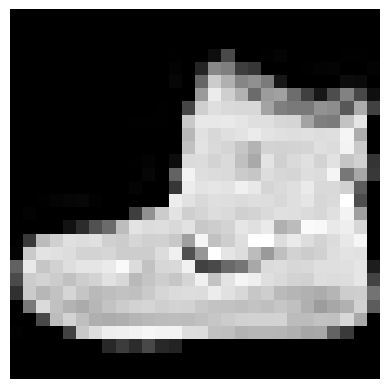

In [11]:
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

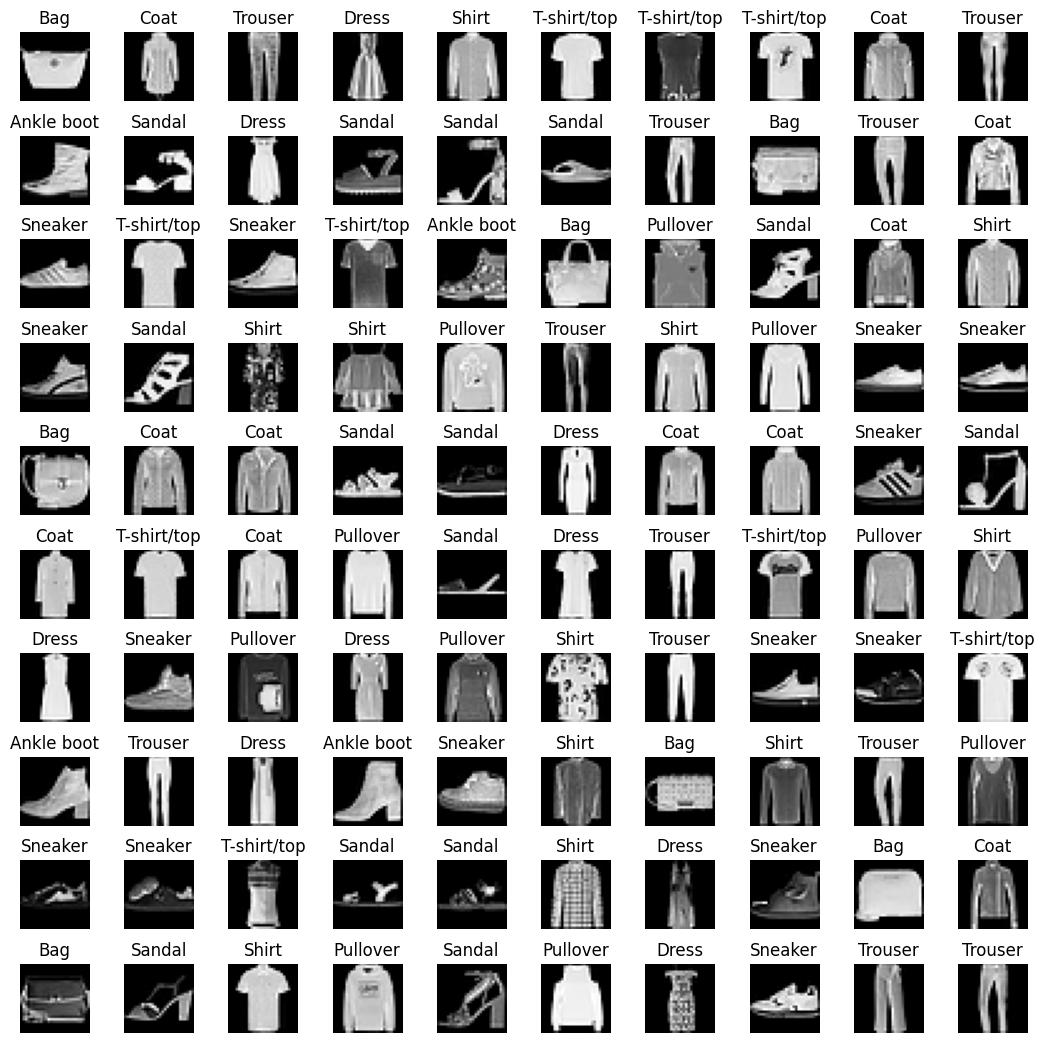

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

altura = 10
largura = 10

fig, axs = plt.subplots(altura, largura, figsize=(13, 13))
for i in range(altura):
    for j in range(largura):
        idx = np.random.randint(0, len(x_train))

        axs[i, j].imshow(x_train[idx], cmap='gray')
        axs[i, j].set_title(class_names[y_train[idx]])
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()